In [12]:
# pip install snownlp
from snownlp import SnowNLP

In [13]:
text = u"我今天很快乐。我今天很愤怒。"

# 分句
s = SnowNLP(text)
for sentence in s.sentences:
    print(sentence)

我今天很快乐
我今天很愤怒


In [14]:
# 情感分析
s1 = SnowNLP(s.sentences[0])
print("句子", s1.sentences, " 属于正向情感的概率为：")
print(s1.sentiments)

句子 ['我今天很快乐']  属于正向情感的概率为：
0.971889316039116


In [15]:
s2 = SnowNLP(s.sentences[1])
print("句子", s2.sentences, " 属于正向情感的概率为：")
print(s2.sentiments)

句子 ['我今天很愤怒']  属于正向情感的概率为：
0.07763913772213482


In [16]:
import pandas as pd
from snownlp import SnowNLP

In [17]:
# 读入评论数据
df = pd.read_excel("restaurant-comments.xlsx")
# print(df.head())
df.head()

,comments,date
0,这辈子最爱吃的火锅，一星期必吃一次啊！最近才知道他家还有免费鸡蛋羹………………炒鸡好吃炒鸡嫩...,2017-05-14 16:00:00
1,第N次来了，还是喜欢?……<br><br>从还没上A餐厅的楼梯开始，服务员已经在那迎宾了，然...,2017-05-10 16:00:00
2,大姨过生日，姐姐定的这家A餐厅的包间，服务真的是没得说，A餐厅的服务也是让我由衷的欣赏，很久...,2017-04-20 16:00:00
3,A餐厅的服务哪家店都一样，体贴入微。这家店是我吃过的排队最短的一家，当然也介于工作日且比较晚...,2017-04-25 16:00:00
4,因为下午要去天津站接人，然后我倩前几天就说想吃A餐厅，然后正好这有，就来这吃了。<br>来的...,2017-05-21 16:00:00


In [18]:
# 单段测试
text = df.comments.iloc[0]
s = SnowNLP(text)
for sentence in s.sentences:
    ss = SnowNLP(sentence)
    print("句子“", ss.sentences, "”的情感倾向为： ", ss.sentiments)

s.sentiments
# for sentence in s.sentences:
#    print(sentence)


句子“ ['这辈子最爱吃的火锅'] ”的情感倾向为：  0.8346266216356828
句子“ ['一星期必吃一次啊'] ”的情感倾向为：  0.48341079623403804
句子“ ['最近才知道他家还有免费鸡蛋羹………………炒鸡好吃炒鸡嫩啊'] ”的情感倾向为：  0.3729175931144453
句子“ ['新出的红皮土豆也好好吃'] ”的情感倾向为：  0.5760602620326408
句子“ ['还有炸酥肉'] ”的情感倾向为：  0.5678758981750985
句子“ ['秒杀任何火锅店啊'] ”的情感倾向为：  0.6097128831151043
句子“ ['服务员太可爱'] ”的情感倾向为：  0.4543463901027439
句子“ ['告诉我们半份豆花是4块儿'] ”的情感倾向为：  0.391434950476364
句子“ ['一份豆花是6块儿'] ”的情感倾向为：  0.29929226034404544
句子“ ['点两个半份比较合适'] ”的情感倾向为：  0.3873895991639451
句子“ ['太实在了哈哈哈'] ”的情感倾向为：  0.5513926209188014
句子“ ['每次妈妈说开心果好吃服务员都给我们打包带走??希望A餐厅早日出咖喱锅'] ”的情感倾向为：  0.7006872383666679
句子“ ['期待ing……'] ”的情感倾向为：  0.6660223402282218


0.4244401030222834

In [19]:
# 定义情感分析函数
def get_sentiment_cn(text):
    s = SnowNLP(text)
    return s.sentiments

In [20]:
# 批量分析
df["sentiment"] = df.comments.apply(get_sentiment_cn)
df.head()

,comments,date,sentiment
0,这辈子最爱吃的火锅，一星期必吃一次啊！最近才知道他家还有免费鸡蛋羹………………炒鸡好吃炒鸡嫩...,2017-05-14 16:00:00,0.424440
1,第N次来了，还是喜欢?……<br><br>从还没上A餐厅的楼梯开始，服务员已经在那迎宾了，然...,2017-05-10 16:00:00,0.450691
2,大姨过生日，姐姐定的这家A餐厅的包间，服务真的是没得说，A餐厅的服务也是让我由衷的欣赏，很久...,2017-04-20 16:00:00,1.000000
3,A餐厅的服务哪家店都一样，体贴入微。这家店是我吃过的排队最短的一家，当然也介于工作日且比较晚...,2017-04-25 16:00:00,0.118200
4,因为下午要去天津站接人，然后我倩前几天就说想吃A餐厅，然后正好这有，就来这吃了。<br>来的...,2017-05-21 16:00:00,0.871226


In [21]:
# 求平均评价
df.sentiment.mean()

0.6987503312852683

In [22]:
# 求中值
df.sentiment.median()

0.9270364310550024

In [23]:
# pip install ggplot
from ggplot import *

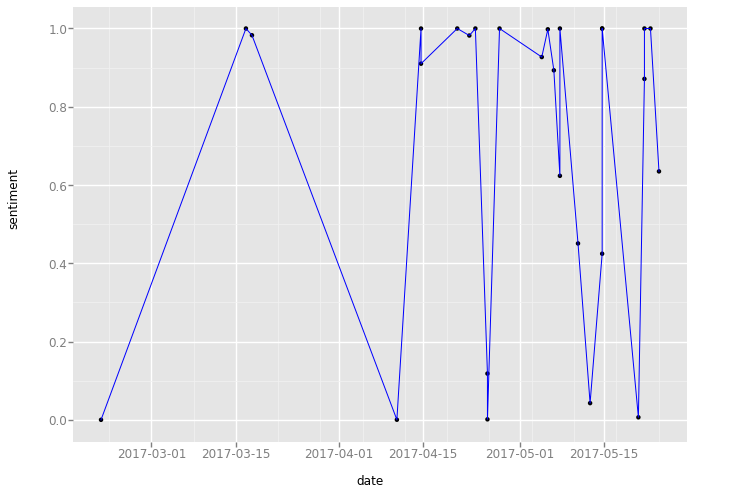

<ggplot: (-9223371943087067484)>

In [24]:
# 情感可视化
ggplot(aes(x="date", y="sentiment"), data=df) + geom_point() + geom_line(color = 'blue') + scale_x_date(labels = date_format("%Y-%m-%d"))

In [26]:
# 排序
df.sort_values(['sentiment'])[:1]

,comments,date,sentiment
24,这次是在情人节当天过去的，以前从来没在情人节正日子出来过，不是因为没有男朋友，而是感觉哪哪人...,2017-02-20 16:00:00,6.334066e-08


In [47]:
# 查看最差评价
print(df.sort_values(['sentiment']).iloc[0].comments)

这次是在情人节当天过去的，以前从来没在情人节正日子出来过，不是因为没有男朋友，而是感觉哪哪人都多，所以特意错开，这次实在是馋A餐厅了，所以赶在正日子也出来了，从下午四点多的时候我看排号就排到一百多了，我从家开车过去得堵的话一个小时，我一看提前两个小时就在网上先排着号了，差不多我们是六点半到的，到那的时候我看号码前面还有才三十多号，我想着肯定没问题了，等一会就能吃上的，没想到悲剧了，就从我们到那坐到等位区开始，大约是十分二十分一叫号，中途多次我都想走了，哈哈，哎，等到最后早上九点才吃上的，服务员感觉也没以前清闲时周到了，不过这肯定的，一人负责好几桌，今天节日这么多人，肯定是很累的，所以大多也都是我自己跑腿，没让服务员给弄太多，就虾滑让服务员下的，然后环境来说感觉卫生方面是不错，就是有些太吵了，味道还是一如既往的那个味道，不过A餐厅最人性化的就是看我们等了两个多小时，上来送了我们一张打折卡，而且当次就可以使用，这点感觉还是挺好的，不愧是A餐厅，就是比一般的要人性化，不过这次就是选错日子了，以后还是得提前预约，要不就别赶节日去，太火爆了！
